In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [13]:
pd.set_option('display.max_columns', None)

Fase 1. Análisis exploratorio de datos (EDA). 

In [14]:
df = pd.read_csv("hr_raw_data.csv")

In [15]:
def exploracion_basica(df):
    print("Primeras filas:")
    display(df.head())
    
    print("\nDimensiones del DataFrame:")
    print(df.shape)
    
    print("\nTipos de datos:")
    print(df.dtypes)
    
    print("\nValores únicos por columna:")
    print(df.nunique())

    print("\nValores Nulos")
    print(df.isnull().sum())

    print("\nValores Duplicados")
    print(df.duplicated().sum())
    


print (exploracion_basica(df))

Primeras filas:


,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0



Dimensiones del DataFrame:
(1678, 42)

Tipos de datos:
Unnamed: 0                    int64
age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relation

In [16]:
nulos = df.isnull().sum()/df.shape[0]*100
# nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

numberchildren              100.000000
yearsincurrentrole           97.914184
department                   81.406436
roledepartament              81.406436
hourlyrate                   75.506555
over18                       55.899881
businesstravel               47.735399
educationfield               46.126341
overtime                     41.477950
maritalstatus                40.226460
totalworkingyears            32.717521
monthlyincome                29.141836
sameasmonthlyincome          29.141836
standardhours                20.917759
salary                       16.984505
performancerating            11.918951
worklifebalance               6.793802
Unnamed: 0                    0.000000
employeecount                 0.000000
education                     0.000000
distancefromhome              0.000000
dailyrate                     0.000000
attrition                     0.000000
age                           0.000000
environmentsatisfaction       0.000000
employeenumber           

In [17]:
df.drop(columns=["employeecount", "hourlyrate", "monthlyrate", "dailyrate", "datebirth", "numberchildren","yearsincurrentrole", "sameasmonthlyincome"], inplace=True)

In [18]:
df["education"] = df["education"].astype(object)

Gestión de nulos y limpieza: overtime, marital status, totalworkingyears, standardhours, worklifebalance


In [19]:
df.head()

,Unnamed: 0,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary,roledepartament,remotework
0,0,51,No,NaN,NaN,6,3,NaN,1,1,0,3,5,resEArch DIREcToR,3,NaN,"16280,83$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",NaN,Yes
1,1,52,No,NaN,NaN,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,NaN,NaN,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",NaN,1
2,2,42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,NaN,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",ManaGER - Research & Development,1
3,3,47,No,travel_rarely,NaN,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",NaN,False
4,4,46,No,NaN,NaN,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,NaN,0


In [20]:
 print(df.shape)

(1678, 34)


In [21]:
for col in df.select_dtypes(include='number'):
    print('-----------------------------')
    print(f"La distribución de las categorías para la columna {col.upper()}")
    print(df[col].nunique())
    print(df[col].value_counts(normalize=True)) 

-----------------------------
La distribución de las categorías para la columna UNNAMED: 0
1678
Unnamed: 0
1677    0.000596
0       0.000596
1       0.000596
2       0.000596
3       0.000596
          ...   
17      0.000596
18      0.000596
19      0.000596
20      0.000596
21      0.000596
Name: proportion, Length: 1678, dtype: float64
-----------------------------
La distribución de las categorías para la columna DISTANCEFROMHOME
69
distancefromhome
 2     0.135876
 1     0.124553
 9     0.053039
 10    0.051251
 8     0.050656
         ...   
-21    0.001192
-43    0.001192
-28    0.001192
-39    0.000596
-40    0.000596
Name: proportion, Length: 69, dtype: float64
-----------------------------
La distribución de las categorías para la columna EMPLOYEENUMBER
1614
employeenumber
300     0.001192
168     0.001192
644     0.001192
271     0.001192
663     0.001192
          ...   
1578    0.000596
1579    0.000596
1580    0.000596
1581    0.000596
1614    0.000596
Name: proportion, L

In [22]:
for col in df.select_dtypes(include='object'):
    print('-----------------------------')
    print(f"La distribución de las categorías para la columna {col.upper()}")
    print(df[col].nunique())
    print(df[col].value_counts(normalize=True)) 

-----------------------------
La distribución de las categorías para la columna AGE
54
age
35              0.052443
31              0.052443
34              0.051251
29              0.048868
36              0.047080
32              0.039333
30              0.038737
38              0.038141
33              0.037545
40              0.035757
28              0.032181
37              0.032181
27              0.032181
45              0.029797
42              0.029797
41              0.028605
39              0.027414
26              0.027414
43              0.025030
46              0.022646
44              0.020262
50              0.020262
47              0.017878
24              0.017282
25              0.016687
49              0.015495
55              0.014899
51              0.013111
48              0.013111
53              0.011919
54              0.011919
52              0.010727
56              0.010727
22              0.010131
21              0.010131
58              0.009535
23       

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1678.0,838.500000,484.541192,0.0,419.25,838.5,1257.75,1677.0
distancefromhome,1678.0,4.504172,14.652066,-49.0,2.00,5.0,11.00,29.0
employeenumber,1678.0,809.859952,467.084867,1.0,403.25,813.5,1215.75,1614.0
environmentsatisfaction,1678.0,4.264005,6.912695,1.0,2.00,3.0,4.00,49.0
gender,1678.0,0.398689,0.489774,0.0,0.00,0.0,1.00,1.0
jobinvolvement,1678.0,2.740763,0.710359,1.0,2.00,3.0,3.00,4.0
joblevel,1678.0,2.064362,1.099425,1.0,1.00,2.0,3.00,5.0
jobsatisfaction,1678.0,2.743147,1.105172,1.0,2.00,3.0,4.00,4.0
numcompaniesworked,1678.0,2.670441,2.501133,0.0,1.00,2.0,4.00,9.0
percentsalaryhike,1678.0,15.154350,3.649607,11.0,12.00,14.0,18.00,25.0


In [24]:
df.describe(include = "object").T

,count,unique,top,freq
age,1678,54,35,88
attrition,1678,2,No,1406
businesstravel,877,3,travel_rarely,616
department,312,3,Research & Development,203
education,1678,5,3,649
educationfield,904,6,Life Sciences,367
jobrole,1678,1579,mANager,5
maritalstatus,1003,5,Married,419
monthlyincome,1189,493,"2342,59$",228
over18,740,1,Y,740


A continuación, vemos la distribución de las distintas variables, pudiendo ver también si existen valores atípicos. 

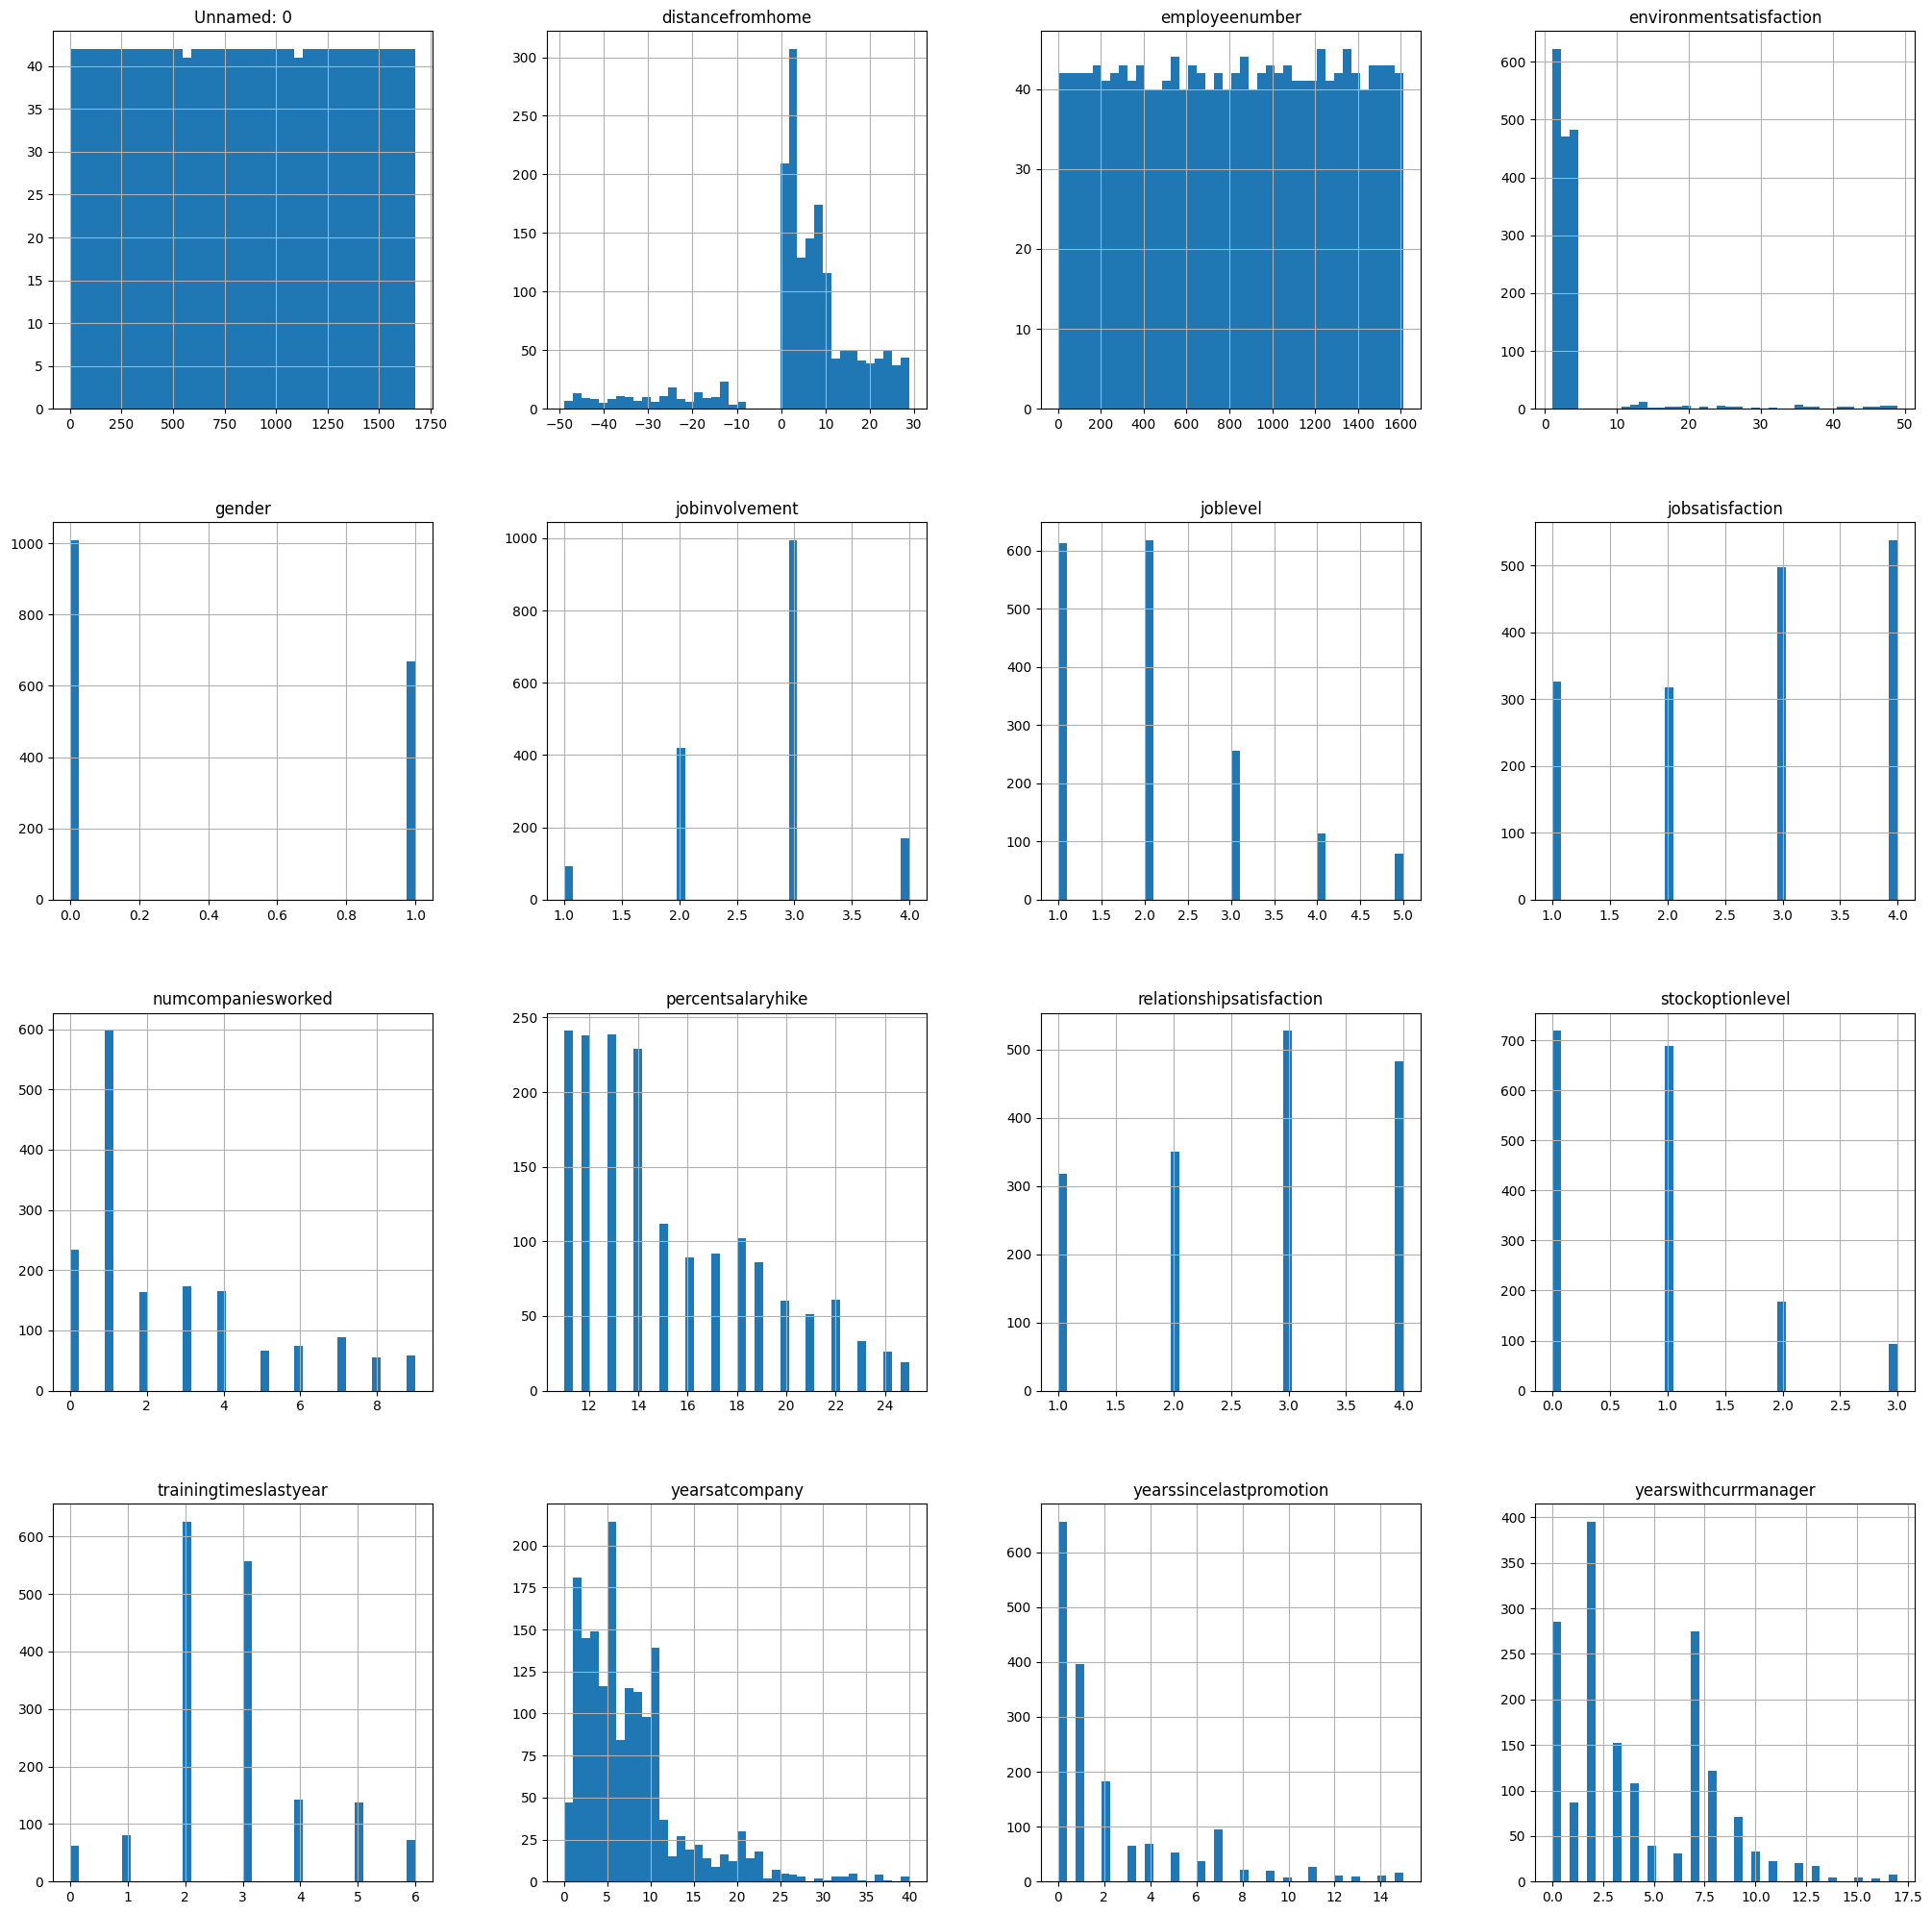

In [25]:
num_bins = 40
df.hist(bins=num_bins, figsize=(25,25))
plt.savefig("histogram_plots")
plt.show()

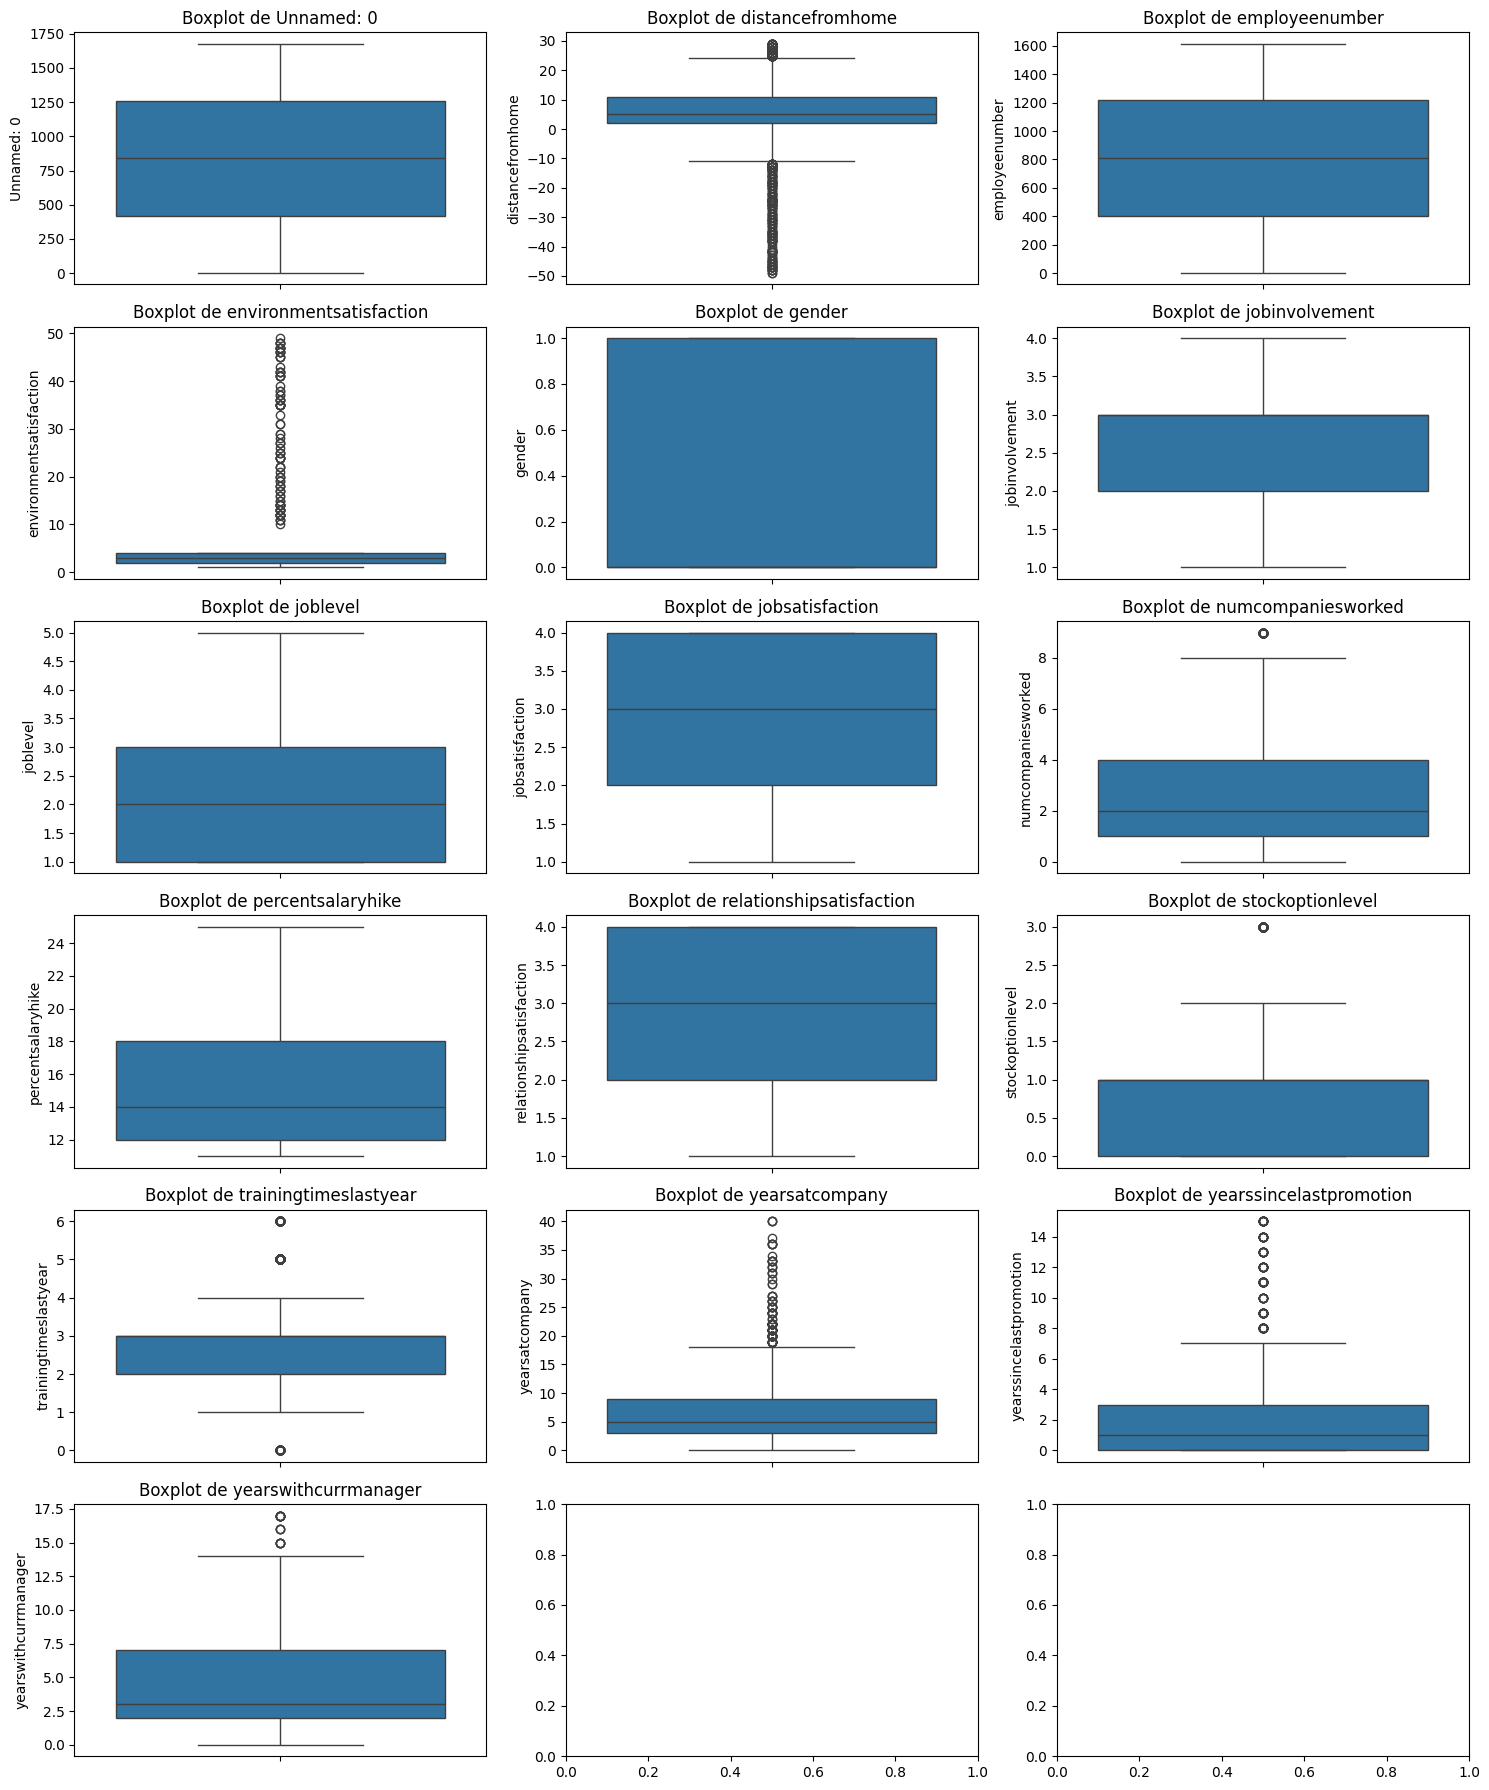

In [26]:
numeric_columns = df.select_dtypes(include=['number']).columns
rows = (len(numeric_columns) // 3) + (len(numeric_columns) % 3 > 0)  # Calcula el número de filas necesarias
cols = 3

# Definir tamaño del gráfico
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows*3))
if rows > 1:
    axes = axes.flatten()
# Iterar sobre cada columna numérica y graficar un boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()